In [23]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from datetime import datetime, date


In [24]:
# Loading the transactions and customer_demographics datasets

trans = pd.read_csv("Transactions_data_cleaned")
cust = pd.read_csv("customer_demo_cleaned")

In [25]:
# Fetching first 5 transaction record

trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [26]:
#printing the no of rows and columns in transactions df

print("The no of rows in transactions dataframe are ", trans.shape[0])
print("The no of columns in transactions dataframe are ", trans.shape[1])

The no of rows in transactions dataframe are  19803
The no of columns in transactions dataframe are  14


In [27]:
# fetchinf first 5 customer_demographic records
cust.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
3,4,Talbot,NaN,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46


In [28]:
#printing the no of rows and columns in customer_demographic df

print("The no of rows in customer_demographic are ", cust.shape[0])
print("The no of columns in customer_demographic are ", cust.shape[1])

The no of rows in customer_demographic are  3912
The no of columns in customer_demographic are  13


In [29]:
#Merging both tarnsaction and customer_demographic df on ColumnID

merged_trans_cust = pd.merge(trans, cust, right_on="customer_id", left_on="customer_id", how="inner")
merged_trans_cust

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,68
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,47
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,Male,89,1976-02-16,Assistant Manager,Health,Affluent Customer,N,No,22.0,47


In [30]:
#printing the no of rows and columns in merged_trans_cust df

print("The no of rows in merged_trans_cust dataframe are ", merged_trans_cust.shape[0])
print("The no of columns in merged_trans_cust dataframe are ", merged_trans_cust.shape[1])

The no of rows in merged_trans_cust dataframe are  19354
The no of columns in merged_trans_cust dataframe are  26


In [31]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [32]:
merged_trans_cust.isnull().sum()

transaction_id                           0
product_id                               0
customer_id                              0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_line                             0
product_class                            0
product_size                             0
list_price                               0
standard_cost                            0
product_first_sold_date                  0
profit                                   0
first_name                               0
last_name                              622
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car   

In [33]:
merged_trans_cust["last_name"].shape

(19354,)

In [34]:
merged_trans_cust["last_name"][merged_trans_cust["last_name"].isnull()]

291      NaN
292      NaN
293      NaN
294      NaN
295      NaN
        ... 
18984    NaN
18985    NaN
18986    NaN
19146    NaN
19147    NaN
Name: last_name, Length: 622, dtype: object

#### There were 627 null values in last_name, so we replaced them with None, as being Noe does not affect the dataframe because n value of first_name is null

In [35]:
merged_trans_cust["last_name"].fillna("None", inplace=True)

In [36]:
merged_trans_cust["last_name"].isnull().sum()

0

In [37]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [38]:
merged_trans_cust.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure          

#### The dataytpe of transaction date is object, so we will change it to datetime datatype

In [39]:
merged_trans_cust["transaction_date"] = pd.to_datetime(merged_trans_cust["transaction_date"])

In [40]:
merged_trans_cust["transaction_date"] .info()

<class 'pandas.core.series.Series'>
RangeIndex: 19354 entries, 0 to 19353
Series name: transaction_date
Non-Null Count  Dtype         
--------------  -----         
19354 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 151.3 KB


## 1. RFM Analysis
RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

Recency (R): Who have purchased recently? Number of days since last purchase (least recency)

Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)

Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [41]:
#Maximum Transaction Date or the latest transaction date in order to calculate the recency

max_trans_date = max(merged_trans_cust["transaction_date"]).date()
max_trans_date

datetime.date(2017, 12, 30)

In [42]:
#Now we will convert max_trans_date to datetime.datetime datatype, so that we can calculate the recent date for every custmer

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")
comparison_date

datetime.datetime(2017, 12, 30, 0, 0)

In [43]:
# By using groupby on customer_Id we will calculate RFM on every gruop by passing dictionaries

rfm_table = merged_trans_cust.groupby("customer_id").agg({"transaction_date": lambda date: (comparison_date - date.max()).days, 
                                                          "product_id": lambda prod_id: len(prod_id),
                                                          "profit": lambda pro: sum(pro)
                                                         })

In [44]:
rfm_table

,transaction_date,product_id,profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [45]:
# we will rename the columns of rfm_table to recency, frequency, monetary

rfm_table.rename(columns={"transaction_date": "recency", 
                          "product_id": "frequency",
                          "profit": "monetary"}, inplace = True)

In [46]:
rfm_table

,recency,frequency,monetary
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [47]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table["r_quartile"] = pd.qcut(rfm_table["recency"],4,['4','3','2','1'])
rfm_table["f_quartile"] = pd.qcut(rfm_table["frequency"],4,['1','2','3','4'])
rfm_table["m_quartile"] = pd.qcut(rfm_table["monetary"],4,['1','2','3','4'])

In [48]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [49]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.
# multiplying 100 to r_quartile, 10 to f_quartile

rfm_table["rfm_score"] = 100*rfm_table["r_quartile"].astype(int)+10*rfm_table["f_quartile"].astype(int)+rfm_table["m_quartile"].astype(int)

In [50]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table["customer_title"] = pd.qcut(rfm_table["rfm_score"],4,["Bronze","Silver","Gold","Platinum"])

In [51]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


#### Merging  RFM Table with  both Transaction and Customer Tables

The RFM_Table dataframe is merged with the Transactions and Customer Demographics datasets, to gain depper insights of Customer Segemnts along with transactions. The dataframes are joined based on customer_ids from both the datasets

In [52]:
trans_cust_rfm = pd.merge(merged_trans_cust, rfm_table, right_on="customer_id", left_on="customer_id", how="inner")

In [53]:
trans_cust_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

#### Creating an Age_Group Column

In [54]:
# This code will create age groups by rounding the age values to the nearest multiple of 10. 
trans_cust_rfm["age_group"] = trans_cust_rfm["age"].apply(lambda x: (math.floor(x/10)+1)*10)

In [55]:
trans_cust_rfm["age_group"]

0        70
1        70
2        70
3        50
4        50
         ..
19349    50
19350    50
19351    50
19352    50
19353    50
Name: age_group, Length: 19354, dtype: int64

#### Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. 

The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.

The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [56]:
def cust_score_title(cols):
    rfm_score= cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [57]:
# Applying the above functions and creating a new column detail_cust_title

trans_cust_rfm["detail_cust_title"] = trans_cust_rfm[["rfm_score"]].apply(cust_score_title, axis=1)

In [58]:
trans_cust_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,age_group,detail_cust_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,75,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,75,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,75,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,20,7,4179.11,3,3,4,334,Gold,50,Potential Customer
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,20,7,4179.11,3,3,4,334,Gold,50,Potential Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,91,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,91,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,91,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,91,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer


In [59]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [60]:
# Applying the above functions and creating a new feature rank

trans_cust_rfm['rank']=trans_cust_rfm[['detail_cust_title']].apply(get_rank, axis=1)

In [61]:
trans_cust_rfm

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,age_group,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19350,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19351,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10
19352,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,4,5170.51,1,1,4,114,Bronze,50,Evasive Customer,10


### 2. Exporting to CSV File
After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and this data will drive the Sales Customer Segmenation Dashboard developed in Power BI.

In [62]:
trans_cust_rfm.to_csv("trans_cust_rfm_Analysis", index=False)

## 3. Data Analysis and Exploration

#### New Customer vs Old Customer Age Distributions

In [63]:
new_cust = pd.read_csv("new_customers_cleaned")

In [64]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           983 non-null    object 
 1   last_name                            954 non-null    object 
 2   gender                               983 non-null    object 
 3   past_3_years_bike_related_purchases  983 non-null    int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            983 non-null    object 
 6   job_industry_category                983 non-null    object 
 7   wealth_segment                       983 non-null    object 
 8   deceased_indicator                   983 non-null    object 
 9   owns_car                             983 non-null    object 
 10  tenure                               983 non-null    int64  
 11  address                         

In [65]:
new_cust["last_name"].fillna("None", inplace=True)

In [66]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           983 non-null    object 
 1   last_name                            983 non-null    object 
 2   gender                               983 non-null    object 
 3   past_3_years_bike_related_purchases  983 non-null    int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            983 non-null    object 
 6   job_industry_category                983 non-null    object 
 7   wealth_segment                       983 non-null    object 
 8   deceased_indicator                   983 non-null    object 
 9   owns_car                             983 non-null    object 
 10  tenure                               983 non-null    int64  
 11  address                         

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


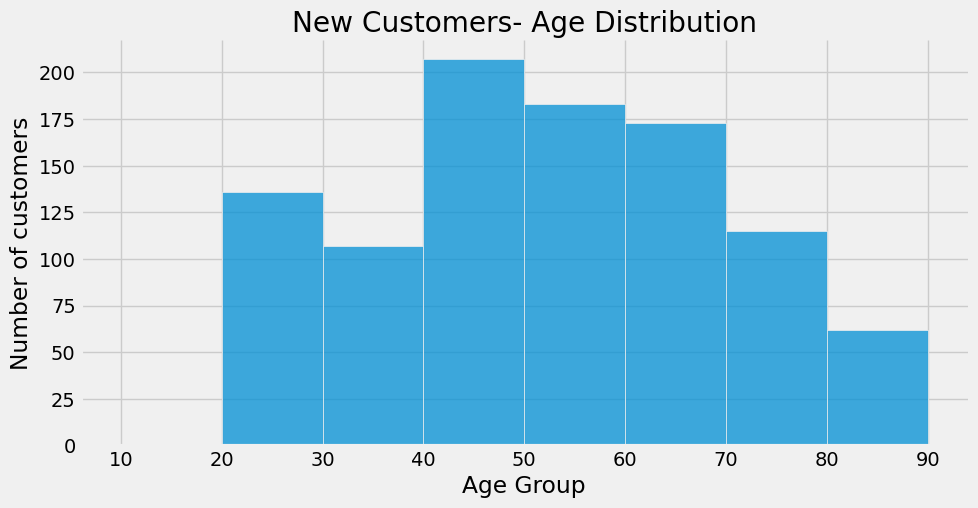

In [67]:
#New Customers Age Distribution

sns.displot(data=new_cust, x="age", kind='hist', bins=[10,20,30,40,50,60,70,80,90], height=5, aspect=2)
plt.title("New Customers- Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of customers")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


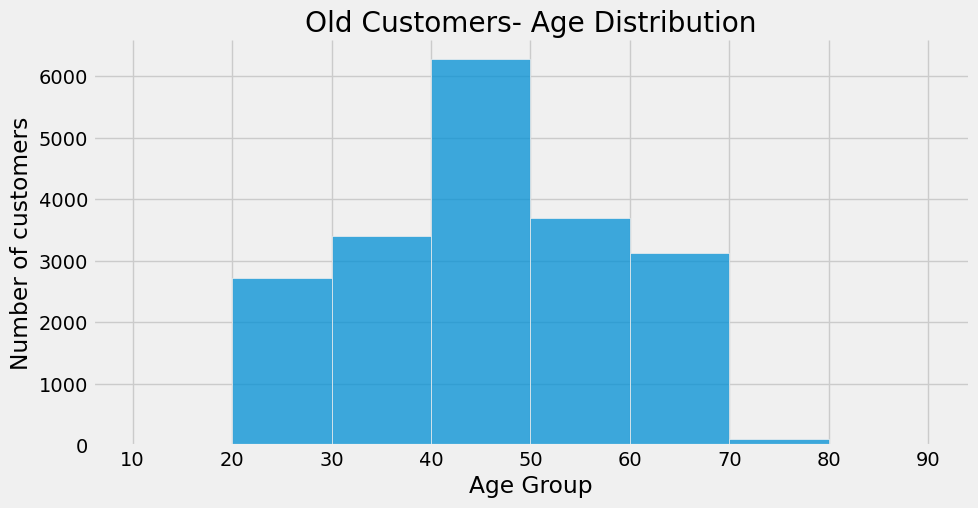

In [68]:
#Old Customers Age distribution
sns.displot(data=trans_cust_rfm, x="age", bins=[10,20,30,40,50,60,70,80,90], height=5, aspect=2 )
plt.title("Old Customers- Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of customers")
plt.show()

It looks like most new customers lies between tha age of 40-50, same goes for old customers as well

Age groups like 70-80, 20-30 are less as compared to other age groups in Old Customers

For new customers age groups like 30-40, 80-90 are less as compared to other age groups

#### Bike related purchases over last 3 years by gender

In [69]:
trans_cust_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [70]:
bike_purchase_by_gender= trans_cust_rfm.groupby("gender").agg({"past_3_years_bike_related_purchases": sum}).reset_index()
print(bike_purchase_by_gender)

total_records= trans_cust_rfm["past_3_years_bike_related_purchases"].sum()
print(total_records)

bike_purchase_by_gender["total_percent"] = bike_purchase_by_gender["past_3_years_bike_related_purchases"]/total_records*100
print(bike_purchase_by_gender)

   gender  past_3_years_bike_related_purchases
0  Female                               478488
1    Male                               468943
947431
   gender  past_3_years_bike_related_purchases  total_percent
0  Female                               478488      50.503731
1    Male                               468943      49.496269


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


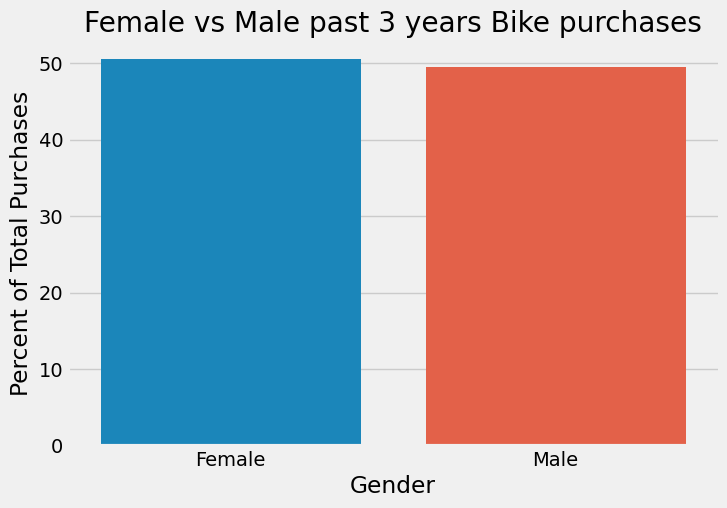

In [71]:
sns.catplot(data=bike_purchase_by_gender, x='gender', y='total_percent', kind='bar', height=5, aspect=1.5)
plt.title("Female vs Male past 3 years Bike purchases")
plt.xlabel("Gender")
plt.ylabel("Percent of Total Purchases")
plt.show()

Over the last 3 years approximately 51% of the buyers are women and 49% were male buyers.

Female purchases are approximately 10,000 more than male (numerically). Gender wise majority of the bike sales comes from female customers

#### Job Industry Customer Distribution

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


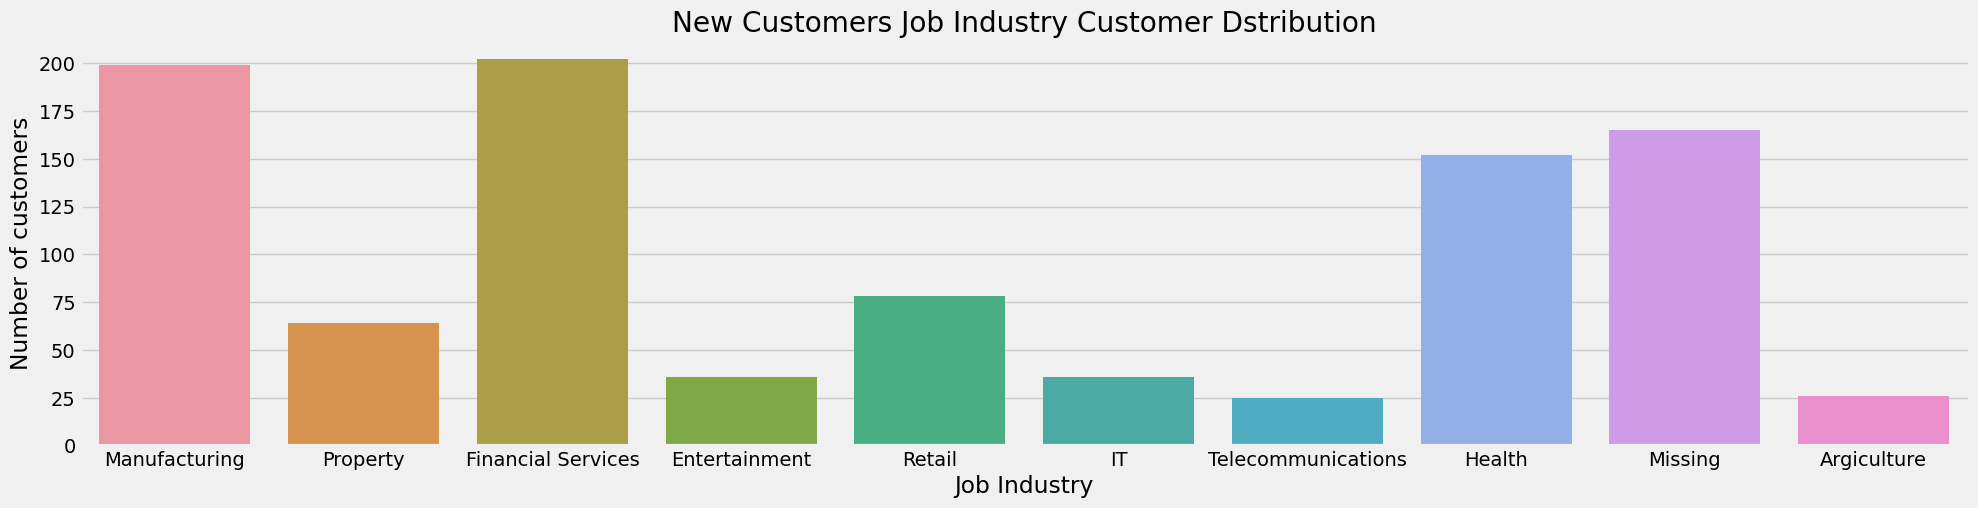

In [72]:
# New Customers
sns.catplot(data=new_cust, x="job_industry_category", kind='count',height=5, aspect=4)
plt.title("New Customers Job Industry Customer Dstribution")
plt.xlabel("Job Industry")
plt.ylabel("Number of customers")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


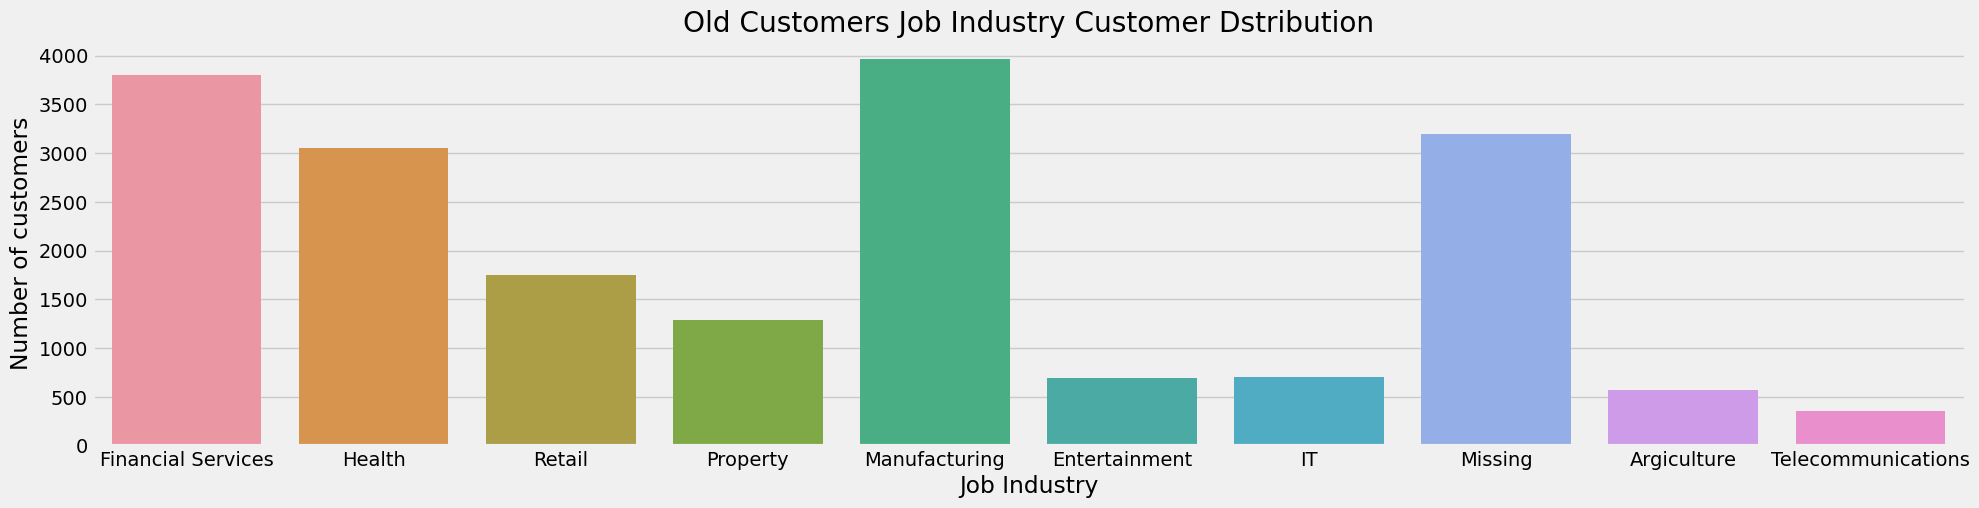

In [73]:
#Old Customers
sns.catplot(data=trans_cust_rfm, x="job_industry_category", kind='count',height=5, aspect=4)
plt.title("Old Customers Job Industry Customer Dstribution")
plt.xlabel("Job Industry")
plt.ylabel("Number of customers")
plt.show()

Among the New Customers the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. 

The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with less sales, Similar trend is observed among Old Customers.

#### Wealth Segmentation by Age Group

In [74]:
wealth_age_new = new_cust.groupby(["wealth_segment", "age_group"]).size().reset_index()


In [75]:
wealth_age_new.rename(columns={0:"number_of_customers"}, inplace=True)
wealth_age_new

,wealth_segment,age_group,number_of_customers
0,Affluent Customer,30,42
1,Affluent Customer,40,19
2,Affluent Customer,50,52
3,Affluent Customer,60,45
4,Affluent Customer,70,34
5,Affluent Customer,80,30
6,Affluent Customer,90,13
7,High Net Worth,30,31
8,High Net Worth,40,34
9,High Net Worth,50,52


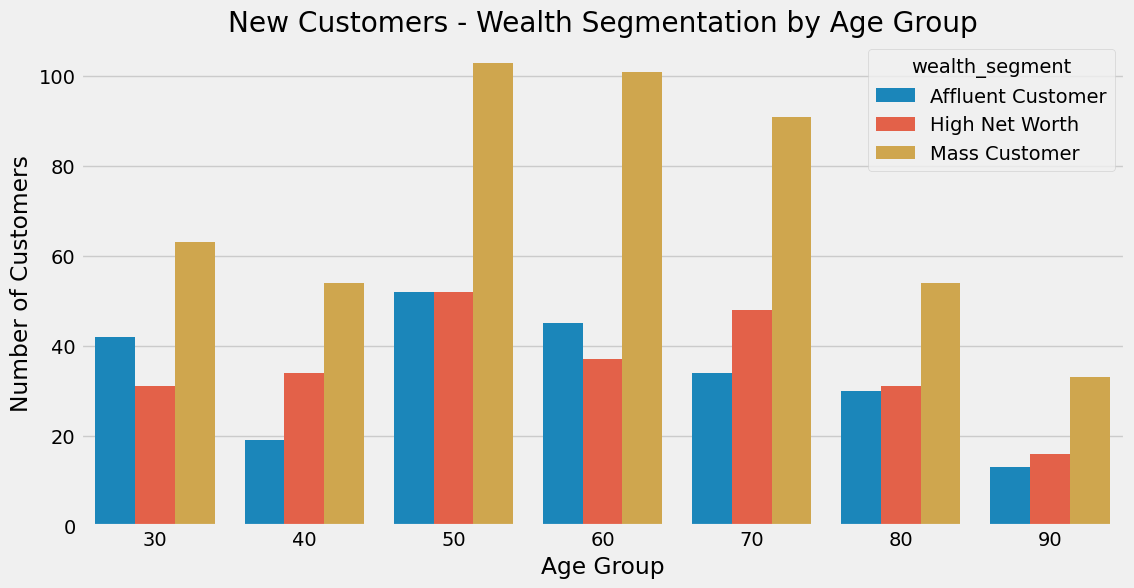

In [76]:
#New Customers
plt.figure(figsize=(12, 6))
sns.barplot(data=wealth_age_new, x='age_group', y='number_of_customers', hue='wealth_segment')
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("New Customers - Wealth Segmentation by Age Group")
plt.show()

In [77]:
#Old Customers
wealth_age_old = trans_cust_rfm.groupby(["wealth_segment", "age_group"]).size().reset_index()


In [78]:
wealth_age_old.rename(columns={0:"number_of_customers"}, inplace=True)
wealth_age_old

,wealth_segment,age_group,number_of_customers
0,Affluent Customer,30,775
1,Affluent Customer,40,810
2,Affluent Customer,50,1429
3,Affluent Customer,60,928
4,Affluent Customer,70,732
5,Affluent Customer,80,36
6,Affluent Customer,100,10
7,High Net Worth,30,611
8,High Net Worth,40,898
9,High Net Worth,50,1657


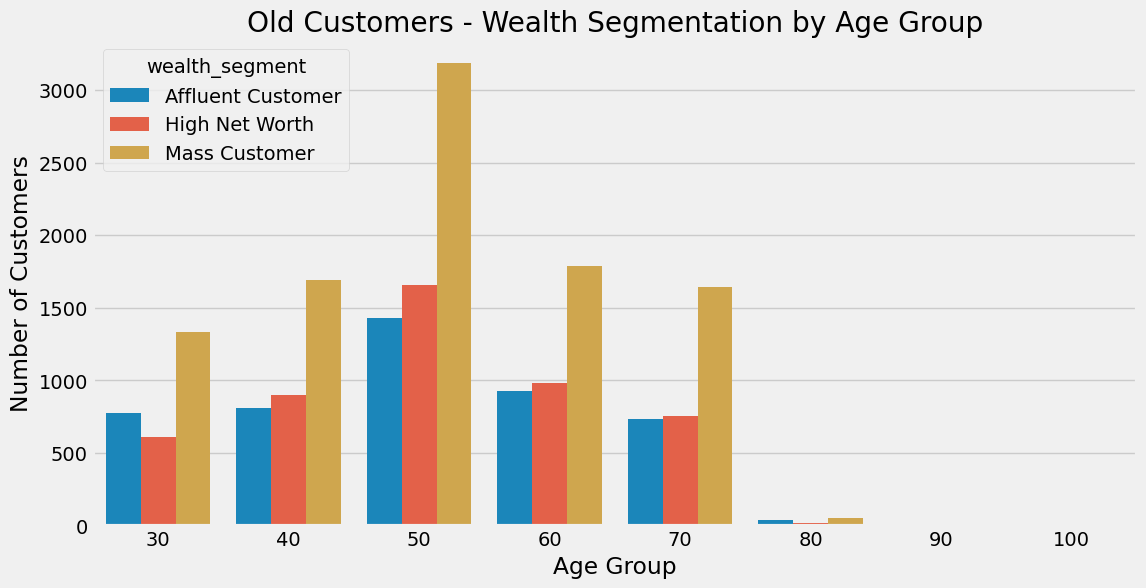

In [79]:
plt.figure(figsize=(12, 6))
sns.barplot(data=wealth_age_old, x='age_group', y='number_of_customers', hue='wealth_segment')
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("Old Customers - Wealth Segmentation by Age Group")
plt.show()

Among new Customers the maximum number of customers are Mass Customers, after that High Net Worth, then Affluent Customer

However the affluent customers for age group 20-30 and 50-60 is more than High Net Worth and are also equal to high net worth in age group 40-50

Among Old Customers the maximun number of customers are also Mass Customers, after High Net Worth, then Affluent Customers

The Affluent Customers in age group 20-30 are more than that of High Net Worth

#### Car owner across each State

In [81]:
cust_address = pd.read_csv("customer_address_cleaned")
cust_address

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [83]:
trans_cust_rfm.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'first_name', 'last_name',
       'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'recency', 'frequency', 'monetary',
       'r_quartile', 'f_quartile', 'm_quartile', 'rfm_score', 'customer_title',
       'age_group', 'detail_cust_title', 'rank'],
      dtype='object')

In [86]:
# Merging the RFM data with Customer Address dataset.

trans_cust_rfm_add = pd.merge(trans_cust_rfm, cust_address, left_on="customer_id", right_on="customer_id", how="inner")
trans_cust_rfm_add

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,rfm_score,customer_title,age_group,detail_cust_title,rank,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,211,Bronze,70,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,211,Bronze,70,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,211,Bronze,70,Almost Lost Customer,9,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,334,Gold,50,Potential Customer,5,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,334,Gold,50,Potential Customer,5,4 Shopko Circle,2196,NSW,Australia,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19322,18735,45,3168,2017-02-21,1.0,Approved,Solex,Standard,medium,medium,...,114,Bronze,50,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7
19323,18789,83,3168,2017-04-11,0.0,Approved,Solex,Touring,medium,large,...,114,Bronze,50,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7
19324,19113,3,3168,2017-06-03,0.0,Approved,Trek Bicycles,Standard,medium,large,...,114,Bronze,50,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7
19325,19912,3,3168,2017-09-30,0.0,Approved,Trek Bicycles,Standard,medium,large,...,114,Bronze,50,Evasive Customer,10,88 Rutledge Crossing,4215,QLD,Australia,7


In [87]:
state_car_owners = trans_cust_rfm_add[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()


In [88]:
state_car_owners

,state,owns_car,0
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


In [89]:
state_car_owners.rename(columns={0:"number_of_customers"}, inplace=True)

In [90]:
state_car_owners

,state,owns_car,number_of_customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


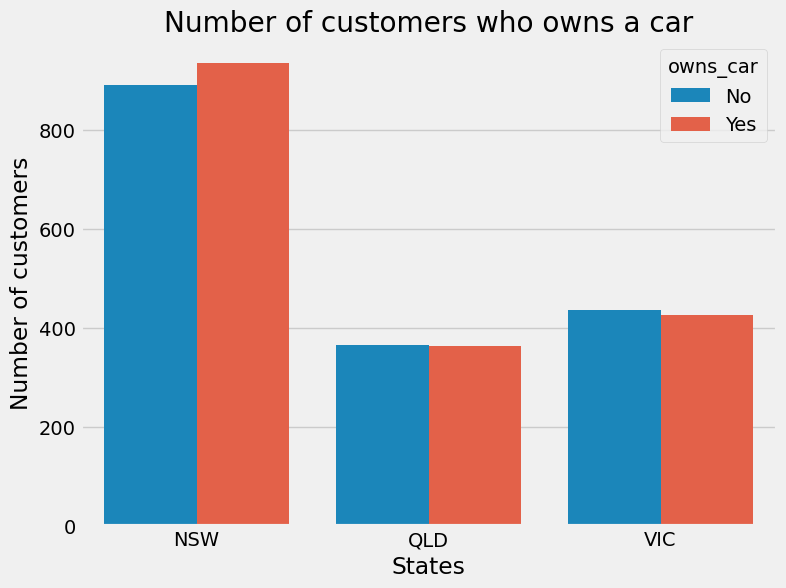

In [97]:
plt.figure(figsize=(8,6))
sns.barplot(data=state_car_owners, x="state", y="number_of_customers", hue="owns_car")
plt.title("Number of customers who owns a car")
plt.xlabel("States")
plt.ylabel("Number of customers")
plt.show()

The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia.

The number of customers in New South Wales (NSW) that do own a car is silghtly higher than the customers that do not own a car

The The number of customers in Queensland (QLD) that do own a car is silghtly lesser than the customers that do not own a car

The number of customers in Victoria (VIC) that do own a car is silghtly lesser than the customers that do not own a car

#### RFM Analysis Scatter Plots

#### Recency VS Monetary

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


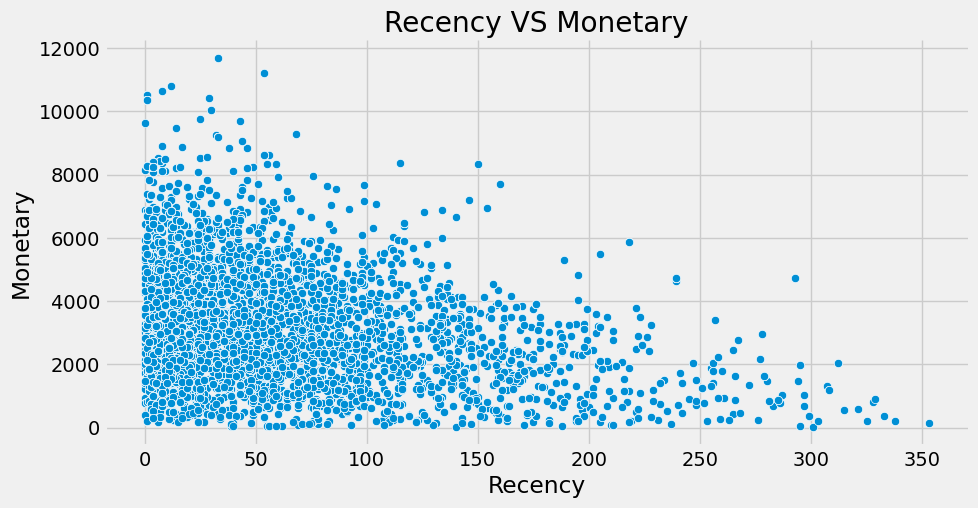

In [116]:
sns.relplot(data=trans_cust_rfm, x='recency', y='monetary', height=5, aspect=2, kind="scatter")
plt.title("Recency VS Monetary")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.show()

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

#### Frequency VS Monetary

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


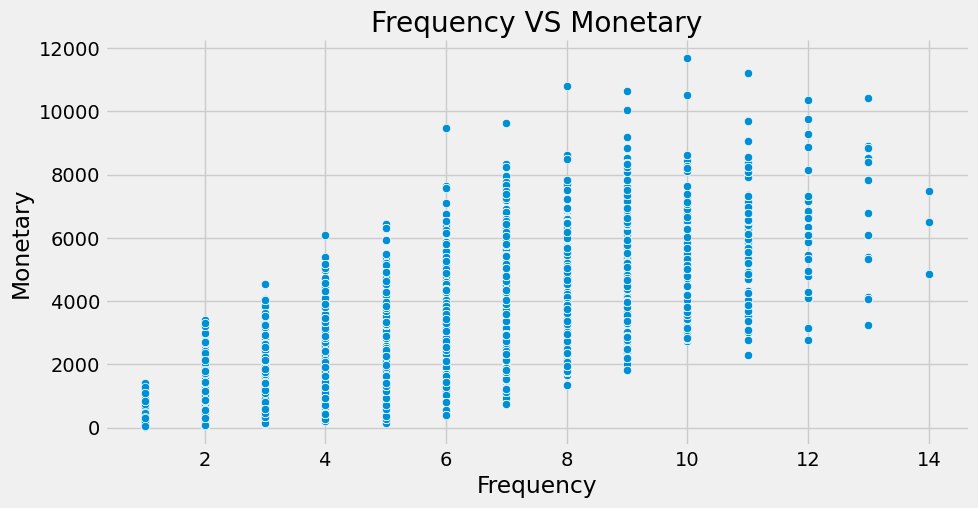

In [115]:
sns.relplot(data=trans_cust_rfm, x='frequency', y='monetary', height=5, aspect=2, kind="scatter")
plt.title("Frequency VS Monetary")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.show()

The frequency betwwen 7-12 indicated that those customers who visit frequently generate a lot of revenue

### Customer Segment Distribution

In [114]:
## Calculating the number of unique customers under a customer title.

cust_per_title = trans_cust_rfm[["customer_id", "detail_cust_title", "rank"]].drop_duplicates().groupby(["detail_cust_title", "rank"]).size().reset_index().sort_values("rank")


In [118]:
cust_per_title.rename(columns={0:"number_of_customers"}, inplace = True)

In [120]:
cust_per_title

,detail_cust_title,rank,number_of_customers
7,Platinum Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


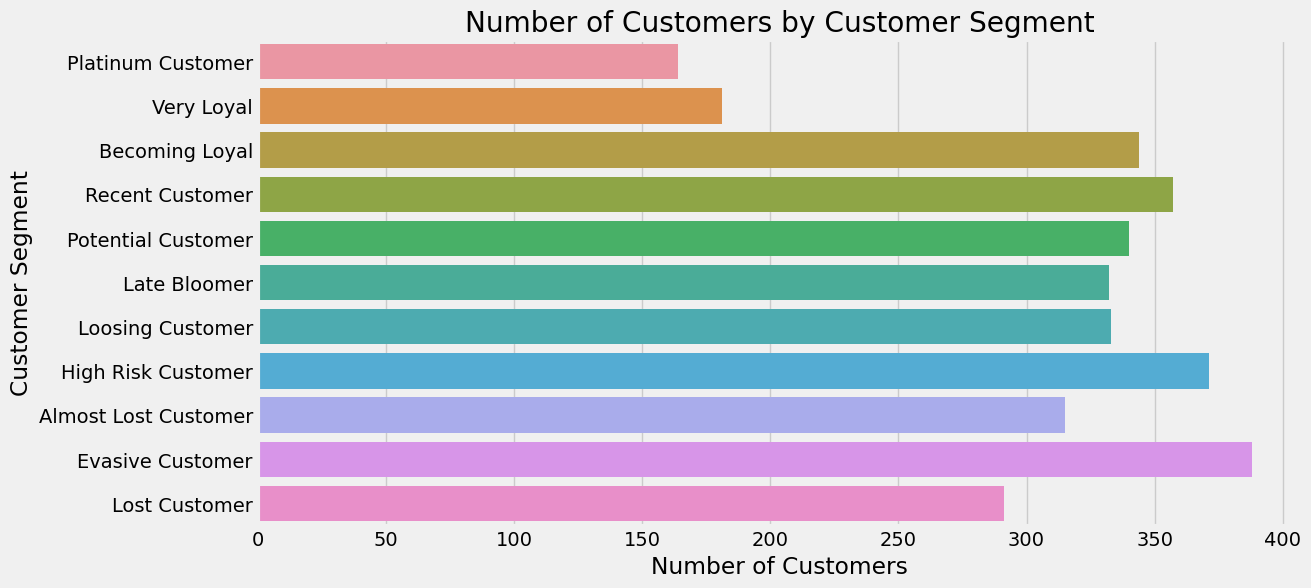

In [124]:
plt.figure(figsize=(12,6))
sns.barplot(data=cust_per_title, x="number_of_customers", y="detail_cust_title")
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

The most number of customers are from Evasive Customers followed by High Risk Customer and Recent Customer